In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv")

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
regression_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[True] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

regression_df = regression_df.reindex(columns=seq)

In [39]:
#populate the regression data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    regression_df.iat[i,1] = tomorrow
    regression_df.iat[i,0] = today

regression_df = regression_df.dropna()

In [40]:
regression_df.head(20)

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
5,0.17,True
6,0.44,True
7,0.41,True
8,0.04,True
9,0.12,True


In [41]:
from sklearn import linear_model
#modify the data to work with this model
x = regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)

In [42]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(x, y)

In [43]:
#we can calculate the accuarcy using the score method
score = clf.score(x,y)
print(score)

0.6707116574023331


In [44]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[13431  1213]
 [ 7199  3703]]


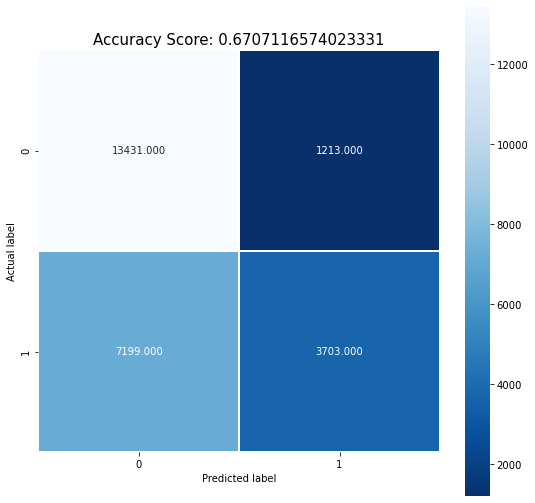

In [45]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

From this point modify the scikit-learn logistic regression method to use two variables.

In [46]:
numrows = 25547 

regression_df= pd.DataFrame({'yesterday':[0.0]*numrows,
                             'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows,
                            })

#sort columns for convience
seq = ['yesterday',
       'today',
       'tomorrow']
regression_df=regression_df.reindex(columns=seq)


numrows = 25547 

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    yesterday = df.iloc[(i-2),1]
    regression_df.iat[i,2] = tomorrow
    regression_df.iat[i,1] = today
    regression_df.iat[i,0] = yesterday 
regression_df=regression_df.dropna() 

In [47]:
regression_df.head()

,yesterday,today,tomorrow
0,0.00,0.00,True
1,0.00,0.47,True
2,0.47,0.59,True
3,0.59,0.42,True
4,0.42,0.31,True


In [48]:
from sklearn import linear_model
#modify the data to work with this model
x = regression_df.yesterday.values + regression_df.today.values
y = regression_df.tomorrow.values
x = x.reshape(regression_df.shape[0], 1)

In [49]:
clf = linear_model.LogisticRegression(solver='lbfgs').fit(x, y)

In [50]:
score = clf.score(x,y)
print(score)

0.6625166392608253


In [51]:
from sklearn import metrics
#we can also make a simple confusion matrix
predictions = clf.predict(x)
cm = metrics.confusion_matrix(y, predictions)
print(cm)

[[12952  1688]
 [ 6932  3970]]


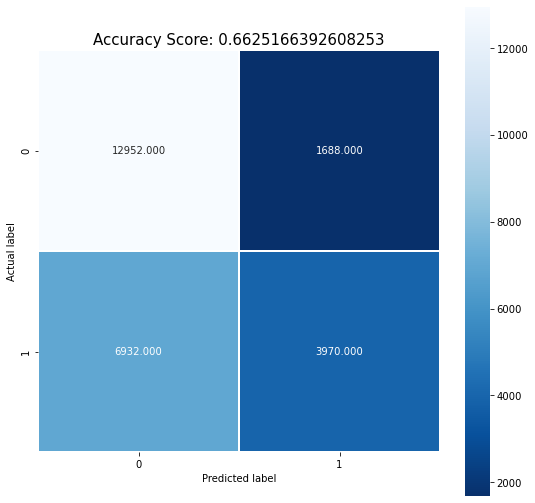

In [52]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);